In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [ ]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


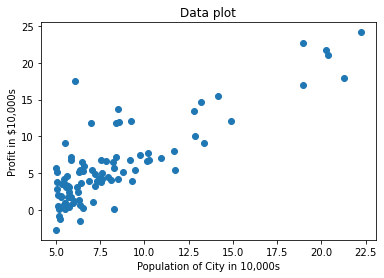

In [ ]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.plot(x, y, 'o')
plt.title('Data plot')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [ ]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [ ]:
def h(X, theta):
  return theta.T @ X

def computeCost(X, y, theta):
  return ((h(X,theta)-y)**2).sum()/2/y.shape[1]

In [ ]:
print(computeCost(X, y, theta))
a = computeCost(X, y, theta)

32.072733877455676


In [ ]:
def gradient_prosty(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = theta.T @ X
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [computeCost(X, y, theta)]

    return theta, cost

In [ ]:
alpha = 0.01
it = 1000

In [ ]:
theta, cost = gradient_prosty(X, y, theta, alpha, it)
print(theta)
print(cost)

[[-3.24140214]
 [ 1.1272942 ]]
[6.737190464870009, 5.9315935686049555, 5.901154707081388, 5.895228586444221, 5.8900949431173295, 5.885004158443647, 5.879932480491418, 5.874879094762575, 5.869843911806385, 5.8648268653129305, 5.859827889932181, 5.85484692057229, 5.849883892376587, 5.844938740722034, 5.840011401218361, 5.835101809707226, 5.830209902261388, 5.825335615183863, 5.820478885007099, 5.815639648492154, 5.810817842627869, 5.806013404630044, 5.801226271940628, 5.7964563822269, 5.7917036733806535, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.772863412319381, 5.768195683989212, 5.76354476854712, 5.758910605434047, 5.754293134309077, 5.749692295048629, 5.745108027745684, 5.740540272709012, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333529, 5.713477184364749, 5.709023361800549, 5.704585581648199, 5.700163786123857, 5.695757917651815, 5.691367918863751, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.673965480401506,

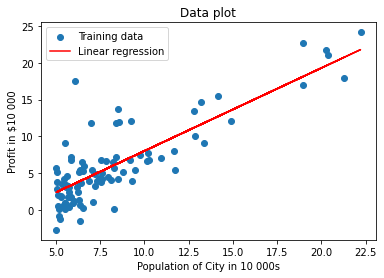

In [ ]:
plt.scatter(x,y,label = 'Training data')
plt.plot(x,h(X,theta).T,'r', label = 'Linear regression')
plt.xlabel('Population of City in 10 000s')
plt.ylabel('Profit in $10 000')
plt.title('Data plot')
plt.legend()
plt.show()

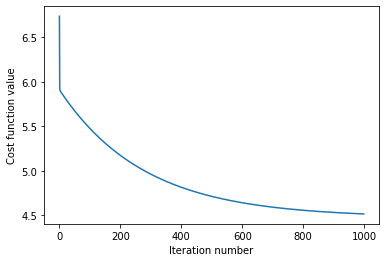

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.show()

In [ ]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data2['Size'] = (data2['Size'] - data2['Size'].mean()) / data2['Size'].std()
data2['Bedrooms'] = (data2['Bedrooms'] - data2['Bedrooms'].mean()) / data2['Bedrooms'].std()
data2['Price'] = (data2['Price'] - data2['Price'].mean()) / data2['Price'].std()

data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [ ]:
x = data2.values[:, 0]
y = data2.values[:, 1]
z = data2.values[:, 2]

In [ ]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x,y], axis=0)
z.shape = [1, z.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [ ]:
print(computeCost(X,z,theta))

0.4893617021276595


In [ ]:
theta, cost = gradient_prosty(X, z, theta, alpha, it)
print(theta)
print(cost)

[[-1.10632543e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]
[0.48054910410767177, 0.47198587701203865, 0.4636646161870627, 0.45557814005252983, 0.4477194833532611, 0.4400818906150643, 0.43265880979889004, 0.42544388614718714, 0.4184309562166347, 0.4116140420916035, 0.4049873457728716, 0.39854524373628336, 0.3922822816562035, 0.38619316928877423, 0.3802727755101314, 0.37451612350488717, 0.3689183861003258, 0.36347488124189703, 0.35818106760572727, 0.35303254034399595, 0.3480250269591544, 0.3431543833030802, 0.3384165896973838, 0.3338077471711977, 0.32932407381288636, 0.32496190123222946, 0.3207176711297256, 0.3165879319697777, 0.3125693357546088, 0.30865863489585715, 0.30485267918089237, 0.30114841283098287, 0.2975428716485305, 0.2940331802506764, 0.29061654938665893, 0.28729027333638907, 0.28405172738778034, 0.28089836539044943, 0.2778277173834724, 0.27483738729495405, 0.27192505071123474, 0.26908845271362497, 0.26632540578062164, 0.26363378775362334, 0.2610115398642198, 0.25845666482119

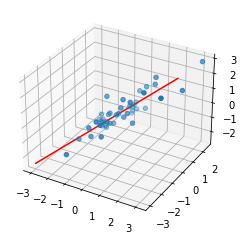

In [ ]:
data_x_y = np.arange(-3, 3)
data_z = theta[0] + theta[1] * data_x_y + theta[2] * data_x_y
ax = plt.axes(projection ='3d')  
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
ax.plot(data_x_y, data_x_y, data_z, 'r')
plt.show()